## **LAB ASSIGNMENT** 

### **Faradisha A - 2141720159 - TI 3I** 

1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).
2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.
3. Perform feature scaling if necessary.
4. Create a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and make predictions on the testing data.
6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

### *Step 1: Importing Libraries and Datasets*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv('../data/insurance.csv')

### *Step 2 - Understanding Data*

In [3]:
# see some preliminary data
data.head()

# check data size
data. shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> After looking at the data above, we can see that there is data that has categorical variables. This causes the data to not be processed. Therefore, an encoding process is needed, namely changing categorical variables into numerical variables

### *Step 3 - Encoding Process*

In [5]:
# categorical data encoding process
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# displays the encoding results
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


> After encoding, the variables that were previously categorical variables change to numeric variables and can be used and calculated

### *Step 4 - Visualize data by identifying variables that will be used in the independent variables (features) and target variables (personal medical costs)*

> Visualizing and determining the independent variables and target variables is very important to understand patterns, correlations, and relevance of features in the data. This also helps in analyzing the data better.

Where the independent variables (age, sex, BMI, children, smoker, and region) are the variables used as input to produce predictions/analysis. And the target variable (charges) is the variable that we want to predict.

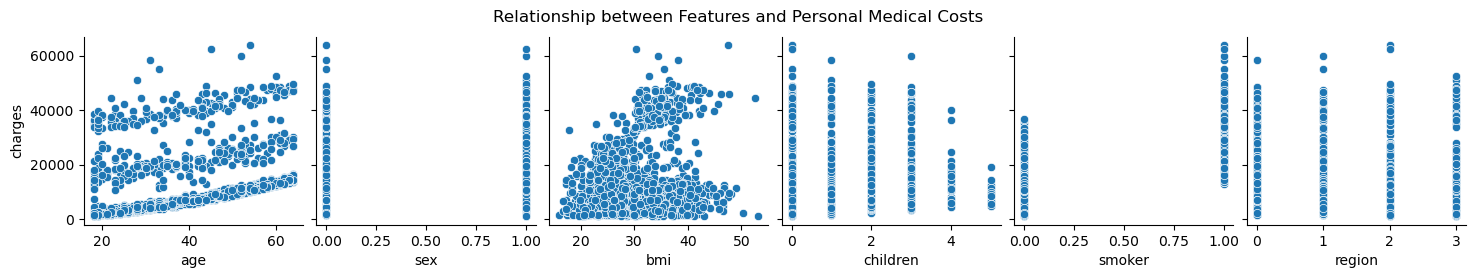

In [6]:
# Pairplot to see the relationship between independent and target variables
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars=['charges'])
plt.suptitle('Relationship between Features and Personal Medical Costs', y=1.07)

# Show plot
plt.show()

### *Step 5 - Divide the dataset into training data and test data with a proportion of 80:20*

> After performing step 4, we also need to divide the dataset into training data and test data to assess and compare the value of various models. The proportion of 80:20 is used because it provides a good balance between training data and test data

In [7]:
from sklearn.model_selection import train_test_split
# Separate independent variables (features) and target variables
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Divide the dataset into training data and test data with a proportion of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *Step 6 - Training the Model on Training Data*

>Training a model on training data is necessary to allow the model to extract patterns from the data that can be used to make accurate predictions on data it has never seen before, such as test data. The code for training the model on training data can be seen below

In [8]:
from sklearn.linear_model import LinearRegression
# Create a model object
model = LinearRegression()

# Train the model with training data
model.fit(X_train, y_train)

LinearRegression()

> The code above imports a linear regression model from the Scikit-Learn library and creates a model object. Then, using the training data (X_train and y_train), the model is trained to understand the relationship between the features (X_train) and the target variable (y_train).

### *Step 7: Predict Test Data*

In [9]:
# To make predictions on test data
y_pred = model.predict(X_test)

a. Scatter Plot


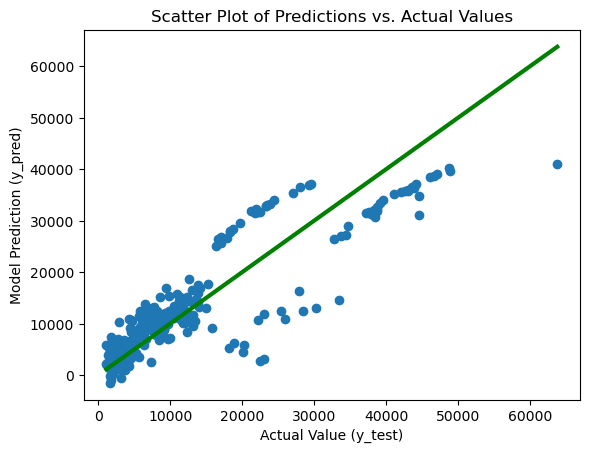

In [10]:
ed = model.predict(X_test)
# Create a scatter plot to compare predictions with actual values
plt.scatter(y_test, y_pred)
print('a. Scatter Plot')
plt.xlabel("Actual Value (y_test)")
plt.ylabel("Model Prediction (y_pred)")
plt.title("Scatter Plot of Predictions vs. Actual Values")

# Adding a regression line (diagonal line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='-', linewidth=3)
plt.show()

> Scatter plots are used to visualize data points and the relationship between two variables. In the code above, I predict test data with a pre-trained model. Then I made a scatter plot comparing the actual value (y_test) with the model prediction (y_pred) to see how far the model prediction is close to the actual value

b. Residual Histogram


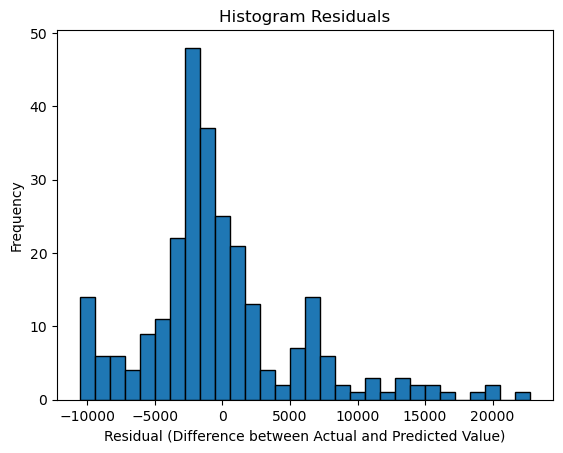

In [11]:
# Calculating residuals
residuals = y_test - y_pred

# Create a residual histogram
plt.hist(residuals, bins=30, edgecolor='k')
print('b. Residual Histogram')
plt.xlabel("Residual (Difference between Actual and Predicted Value)")
plt.ylabel("Frequency")
plt.title("Histogram Residuals")
plt.show()

> For the residual histogram, it is necessary to calculate the actual value and the model prediction on the test data. In the code above, I calculated the residual by subtracting the actual value (y_test) from the model prediction (y_pred) and then displaying the histogram with plt.hist(). A histogram that is symmetrical to the distribution is a good indication in predicting test data

### *Step 8 - Perform Feature Scaling*

In [12]:
# Feature Scaling
y = y.values.reshape(-1,1) # Change data from 1D to 2D with 1 column

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

>Use StandardScaler to scale feature X and target y. The code also converts the target data into a suitable format and standardizes the dataset features, ensuring that the data is ready to be used to train the model and avoiding scale discrepancy issues.

### *Step 9 - Fitting SVR to Dataset*

In [13]:
# Fitting SVR to Dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

c:\Users\faral\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

> The above code imports the SVM from Scikit-Learn and creates an SVR model object with the appropriate kernel 'rbf'. Then train the SVR model with scaled data

**Because we have performed feature scaling and SVR fitting to the dataset, the next step is to visualize the results of the SVR model and create a plot that compares the actual value 'y' with the model prediction 'y_pred'.**

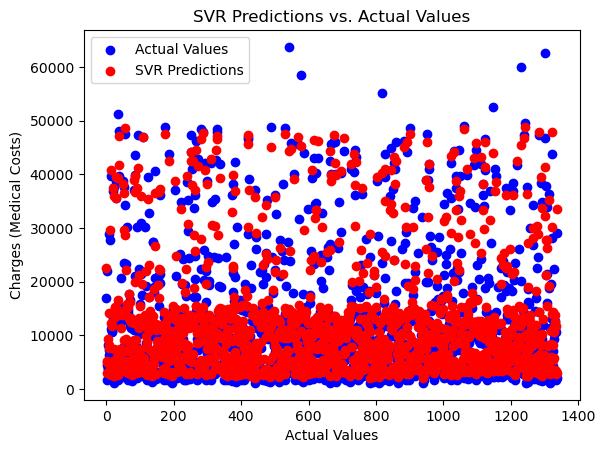

In [22]:
# Predicting on the training data
y_pred_scaled = svr.predict(X)

# Reshape the 1D array to 2D
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)

# Inverse transform the reshaped scaled predictions
y_pred = sc_y.inverse_transform(y_pred_scaled_reshaped)

# Inverse transform the scaled actual values
y_actual = sc_y.inverse_transform(y)

# Plotting the prediction results vs. actual values
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='SVR Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Charges (Medical Costs)')
plt.legend()
plt.title('SVR Predictions vs. Actual Values')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_actual = y 
y_pred = svr.predict(X)
# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

# Menampilkan r-squared, mae, mse, rmse  
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.8580074170742829
MAE: 0.20128586735349396
MSE: 0.14199258292571715
RMSE: 0.3768190320640893
